In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def gz(x,y,z,dens, xc, yc, zc, a, b, c):
    G = 6.67e-11
    xi = xc - a/2; xf = xc + a/2
    yi = yc - b/2; yf = yc + b/2
    zi = zc - c/2; zf = zc + c/2
    
    def kernel(xs, ys, zs):
        dx = x - xs; dy = y - ys; dz = z - zs
        r = np.sqrt(dx**2 + dy**2 + dz**2)
        return (-G*dz*dens)/r**3
    
    i = integrate.tplquad(kernel, zi, zf, yi, yf, xi, xf)
    return i[0]

In [3]:
n = 30
i = 0
f = 100

x = np.linspace(i, f, n)
y = np.linspace(i, f, n)

X, Y = np.meshgrid(x,y)

In [5]:
g = np.zeros((n,n), dtype=np.float64)
for i in range(n):
    for j in range(n):
        g[i][j] = gz(X[i][j], Y[i][j], -10, 200, 50, 50, 10,10,10, 5)

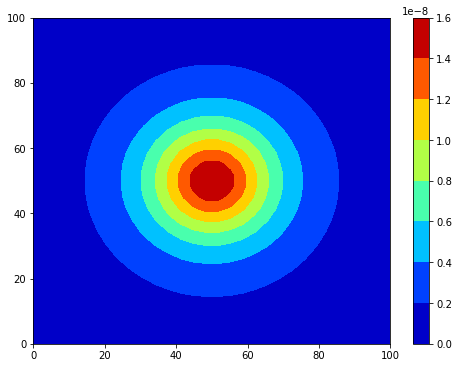

In [6]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.contourf(X, Y, g, cmap = 'jet')
plt.colorbar()
plt.show()

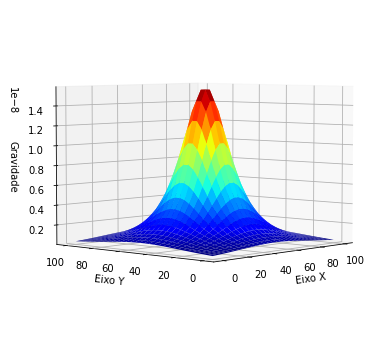

In [7]:
ax= plt.axes(projection='3d')
ax.plot_surface(X, Y, g, cmap='jet')

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Gravidade')

ax.view_init(4,222)
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()